In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('data_for_lr.csv')

In [2]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
df.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [4]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
df=df.dropna()

### Spliting Data

In [6]:
# Training data
train_input=np.array(df.x[0:500]).reshape(500,1)

In [7]:
train_output=np.array(df.y[0:500]).reshape(500,1)
# Validation Data
valid_input=np.array(df.x[500:700]).reshape(199,1)
valid_output=np.array(df.y[500:700]).reshape(199,1)

In [8]:
valid_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

<font color=Red></font>

<font color="red"></font>

<font color="red">Linear Regression</font>

<font color="green">Forward Propagation</font>

In [9]:
# parameters is dictionary containing m and c
def forward_propagation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    prediction=np.multiply(train_input,m)+c
    return prediction

<font color="green">Cost Function</font>

In [10]:
def cost_function(train_output,predict_output):
    s=0
    n=len(train_output)
    for i in range(n):
        s=s+((predict_output[i][0]-train_output[i][0])**2)
    s=s/(2*n)
    return s

<font color="green">Backward Propagation</font>
<p>df=(predict_output-train_output)/n</p>
<p>dm= df*(x)</p>
<p>dc=df*1</p>

In [11]:
def backward_propagation(train_input,train_output,predict_output):
    derivative={}
    df=(predict_output-train_output)
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    derivative["dm"]=dm
    derivative["dc"]=dc
    return derivative

<font color="green">Update Parameters</font>
<p>m'=m-(alpha*(dm))</p>
<p>c'=c-(alpha*(dc))</p>

In [12]:
def update_parameters(derivative,parameters,learning_rate):
    m=parameters["m"]
    c=parameters["c"]
    dm=derivative["dm"]
    dc=derivative["dc"]
    parameters["m"]=m-((learning_rate)*dm)
    parameters["c"]=c-((learning_rate)*dc)
    #parameters1={m:new_m,c:new_c}
    return parameters

### Training Model

In [13]:
import matplotlib.axes as ax

In [14]:
def training(train_input,train_output,learning_rate,iteration):
    #using randomization
    parameters={}
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    plt.figure()
    loss=[]
    for i in range(iteration):
        #forward propagation
        predict_output=forward_propagation(train_input,parameters)
        #cost function
        cost=cost_function(train_output,predict_output)
        loss.append(cost)
        print(f"Iteration : {i} Loss: {cost}")
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,predict_output,"*",label="Training")
        legend=ax.legend()
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predict_output,"*",label="Training")
        plt.show()
        #backward propagation
        derivatives=backward_propagation(train_input,train_output,predict_output)
        #Update parameters
        parameters=update_parameters(derivatives,parameters,learning_rate)
    return parameters,loss

Iteration : 0 Loss: 40.487952719752414


<Figure size 640x480 with 0 Axes>

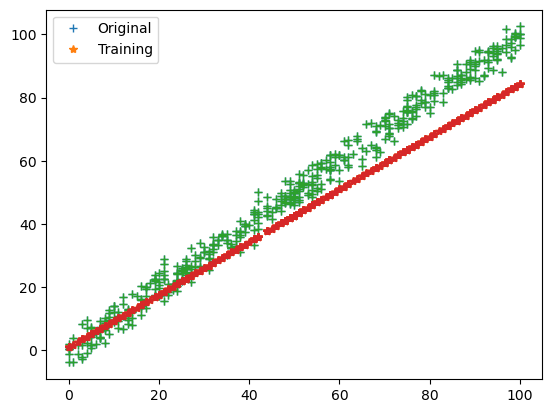

Iteration : 1 Loss: 20.610606208072877


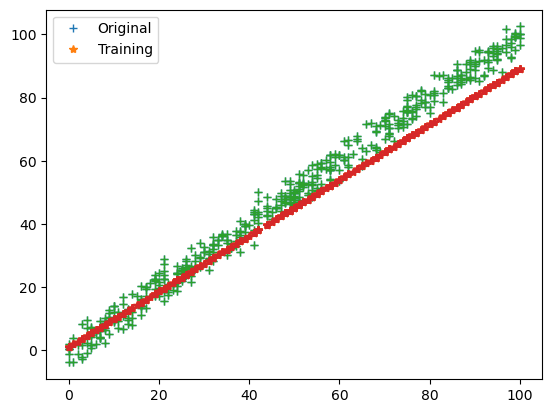

Iteration : 2 Loss: 11.592226791990013


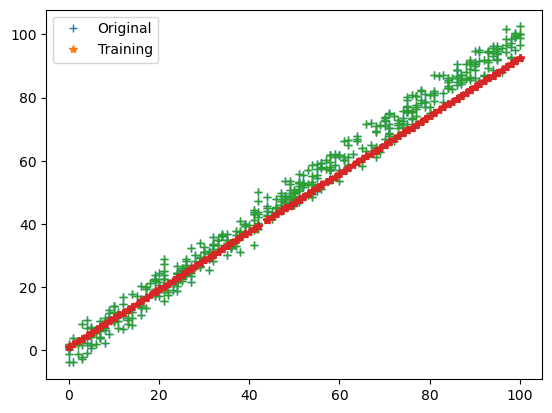

Iteration : 3 Loss: 7.500572775285193


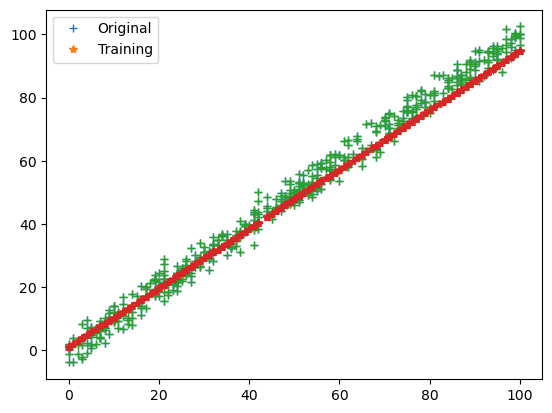

Iteration : 4 Loss: 5.644179529588612


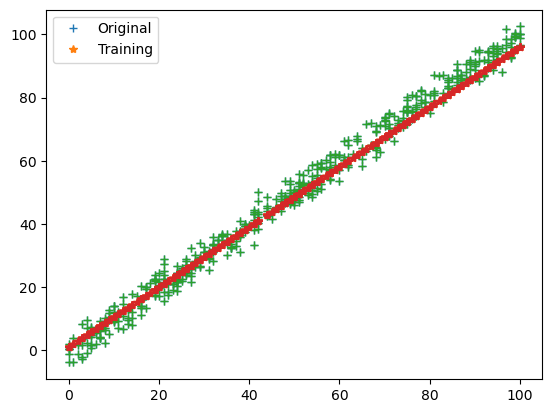

Iteration : 5 Loss: 4.801926571831681


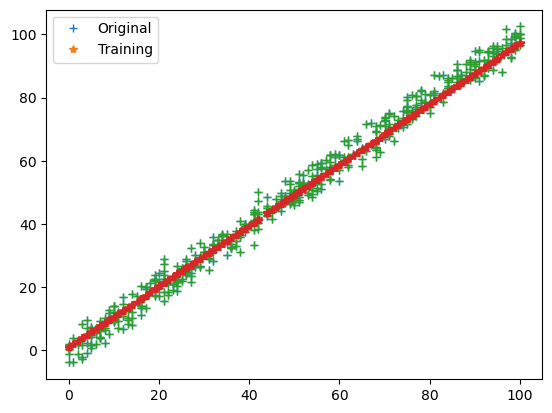

Iteration : 6 Loss: 4.419790186282849


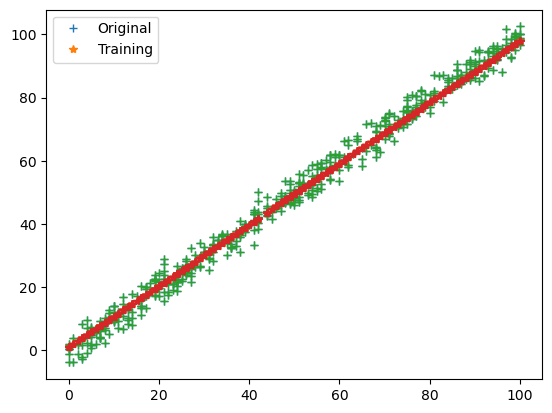

Iteration : 7 Loss: 4.246409199455153


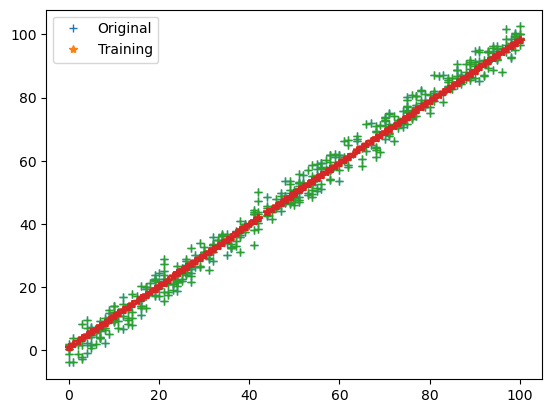

Iteration : 8 Loss: 4.167740768519557


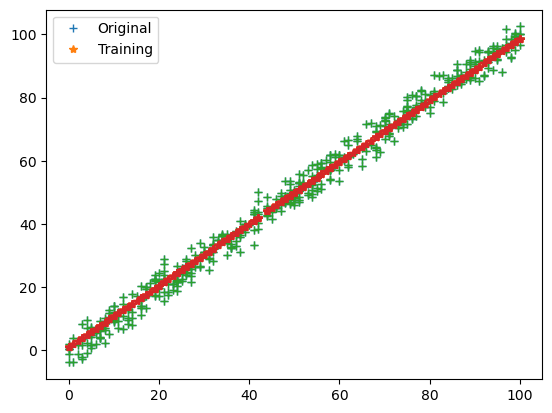

Iteration : 9 Loss: 4.1320435293659745


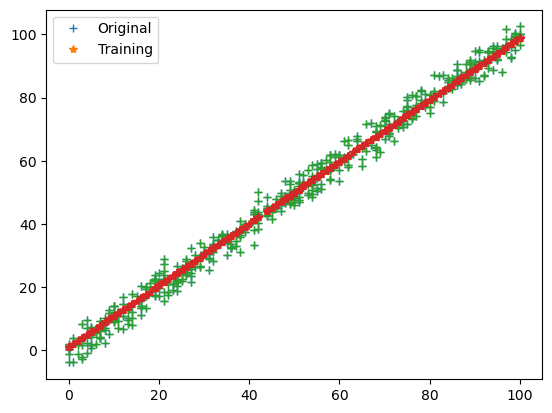

Iteration : 10 Loss: 4.115842367786783


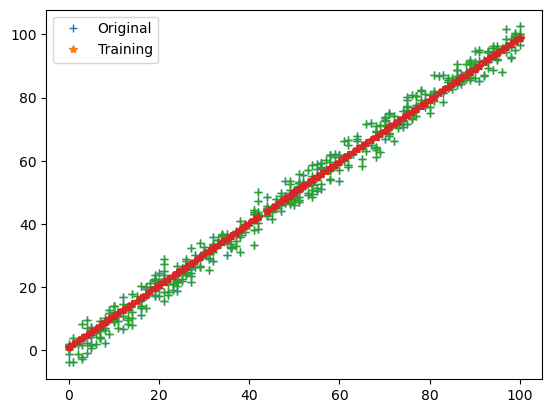

Iteration : 11 Loss: 4.108486598463943


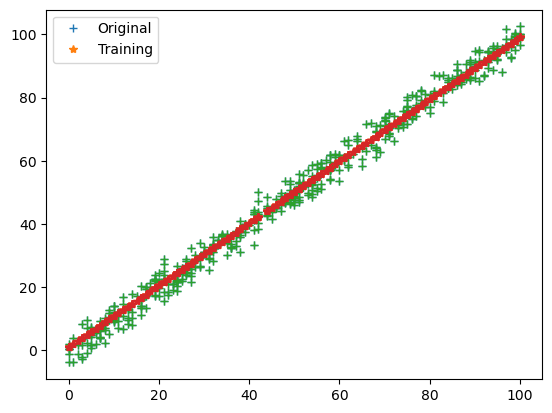

Iteration : 12 Loss: 4.105143993671529


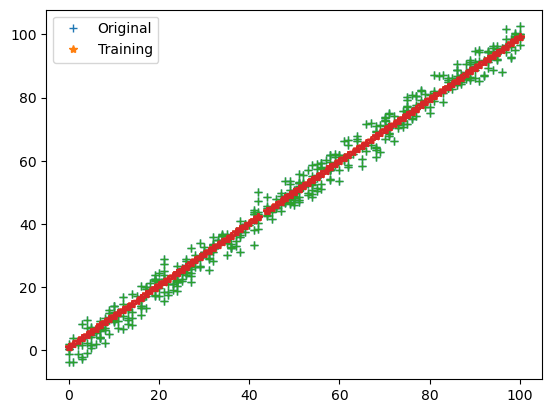

Iteration : 13 Loss: 4.103622166337889


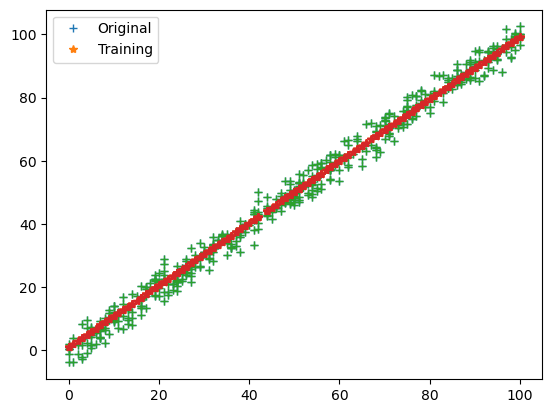

Iteration : 14 Loss: 4.102926428020228


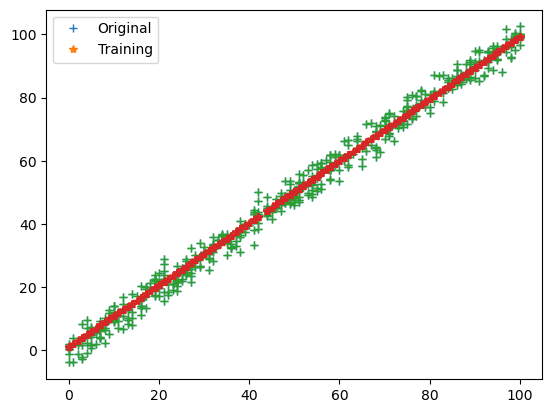

Iteration : 15 Loss: 4.102605487470282


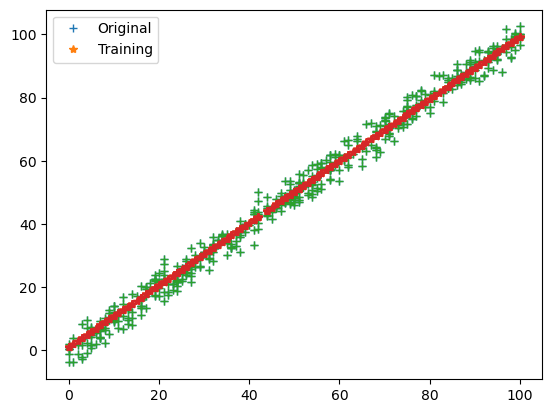

Iteration : 16 Loss: 4.10245459334882


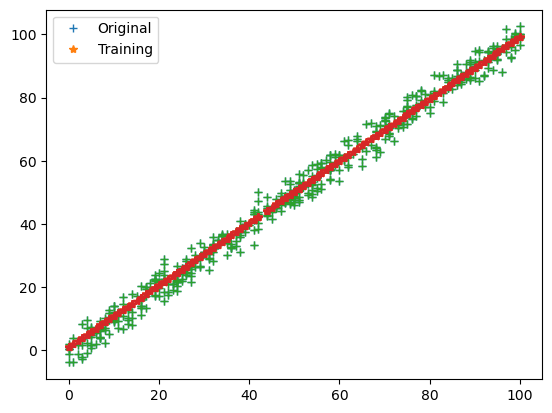

Iteration : 17 Loss: 4.102380849746446


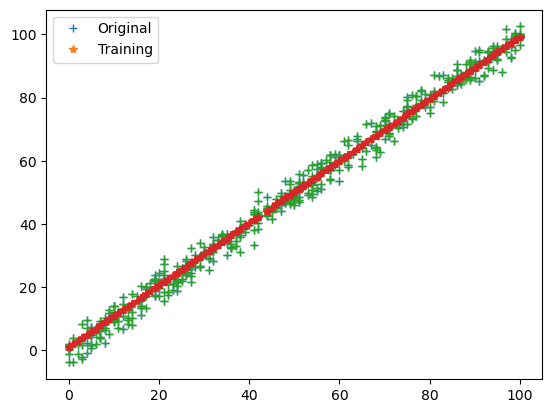

Iteration : 18 Loss: 4.102342109686144


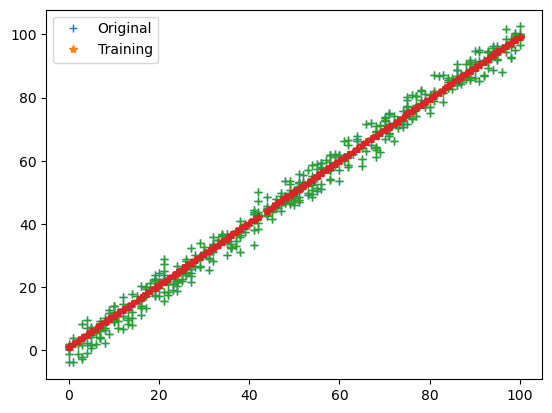

Iteration : 19 Loss: 4.10231925103774


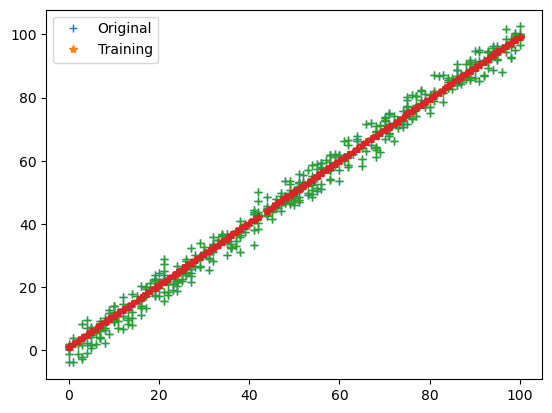

Iteration : 20 Loss: 4.102303598069602


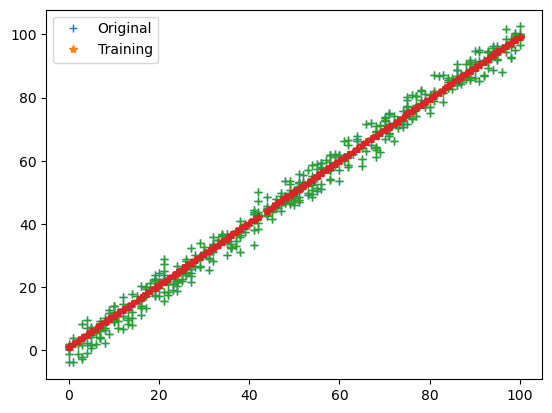

Iteration : 21 Loss: 4.102291214592647


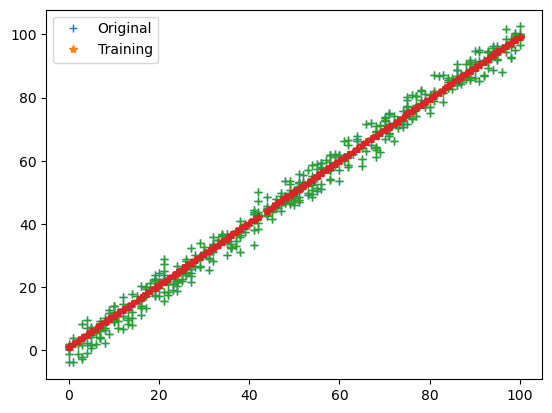

Iteration : 22 Loss: 4.102280314753513


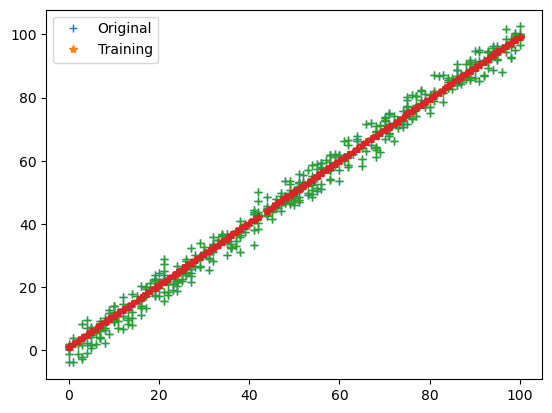

Iteration : 23 Loss: 4.1022700883085585


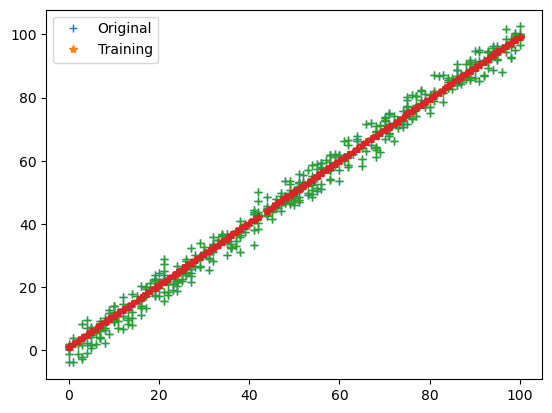

Iteration : 24 Loss: 4.102260167649312


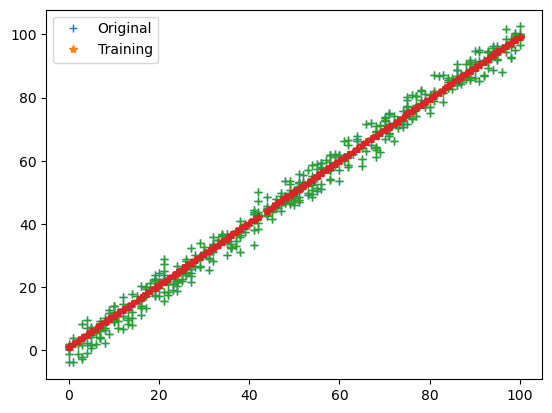

Iteration : 25 Loss: 4.102250385991402


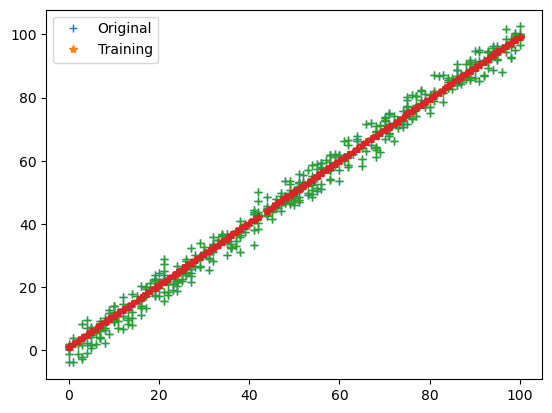

Iteration : 26 Loss: 4.102240667664549


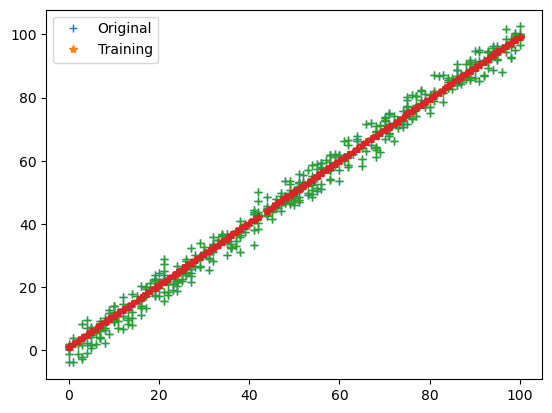

Iteration : 27 Loss: 4.102230978337062


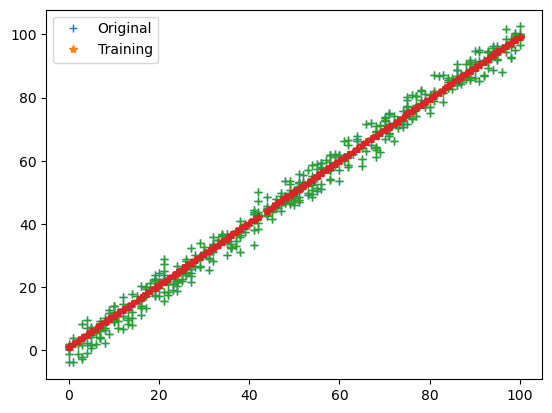

Iteration : 28 Loss: 4.10222130243259


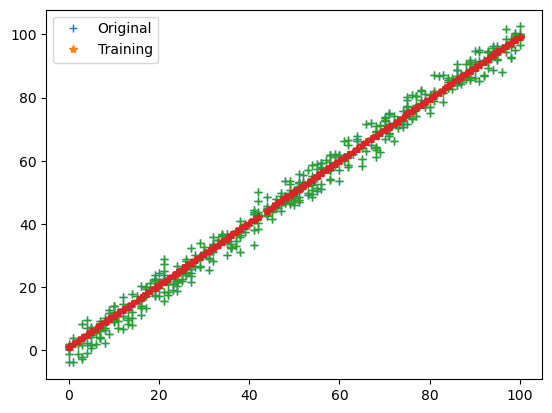

Iteration : 29 Loss: 4.102211632884126


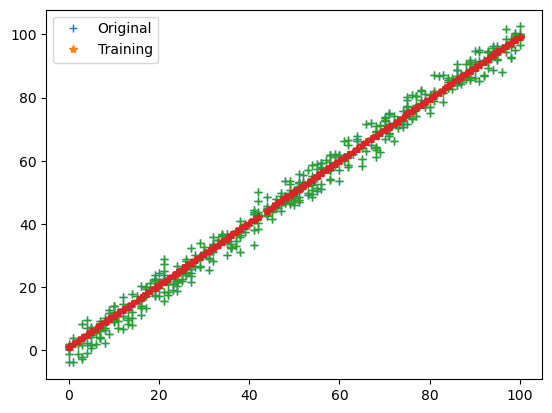

In [15]:
parameter,loss=training(train_input,train_output,0.0001,30)

In [16]:
print(parameter)

{'m': 0.9823124650303089, 'c': 0.9980606001042723}


### Predicting Data

In [17]:
predict_output1=forward_propagation(valid_input,parameter)

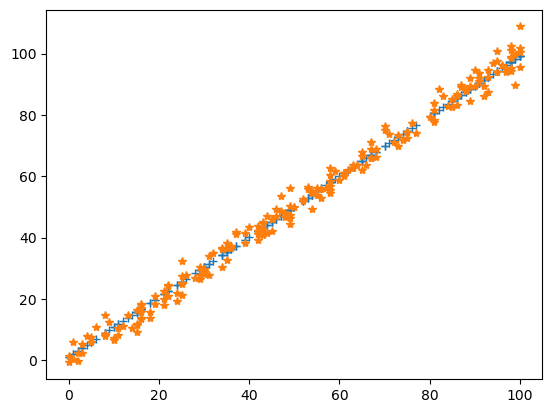

In [20]:
plt.plot(valid_input,predict_output1,"+",label="Predicted")
plt.plot(valid_input,valid_output,"*",label="Original")
plt.show()

In [21]:
predict_output1

array([[ 5.90962293],
       [60.91912097],
       [47.16674646],
       [97.26468217],
       [30.46743455],
       [62.8837459 ],
       [ 0.9980606 ],
       [99.2293071 ],
       [18.67968497],
       [30.46743455],
       [97.26468217],
       [16.71506004],
       [22.60893483],
       [55.02524618],
       [43.2374966 ],
       [74.67149548],
       [90.38849492],
       [46.18443399],
       [84.49462013],
       [55.02524618],
       [36.36130934],
       [49.13137139],
       [93.33543231],
       [43.2374966 ],
       [22.60893483],
       [37.34362181],
       [24.57355976],
       [94.31774478],
       [60.91912097],
       [74.67149548],
       [67.79530822],
       [57.97218357],
       [ 5.90962293],
       [53.06062125],
       [79.5830578 ],
       [82.5299952 ],
       [25.55587223],
       [34.39668441],
       [26.53818469],
       [89.40618245],
       [59.9368085 ],
       [49.13137139],
       [19.66199744],
       [91.37080738],
       [29.48512209],
       [ 8

In [22]:
valid_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

In [23]:
cost=cost_function(predict_output1,valid_output)

In [24]:
cost

4.067689744334821

#### As cost is around 4.06 so the maximum difference between our predicted output and original output is equal to cost